In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
#normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation= "relu"),
    Dense(10, activation= "softmax")
])

In [10]:
model.compile(
    optimizer = Adam(),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

history = model.fit(x_train, y_train, epochs = 5, batch_size = 64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 60s 61ms/step - loss: 0.2512 - accuracy: 0.9222 - val_loss: 0.1137 - val_accuracy: 0.9634
Epoch 2/5
938/938 [==============================] - 58s 61ms/step - loss: 0.0801 - accuracy: 0.9755 - val_loss: 0.0655 - val_accuracy: 0.9795
Epoch 3/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0563 - val_accuracy: 0.9824
Epoch 4/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.0444 - val_accuracy: 0.9866
Epoch 5/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0360 - accuracy: 0.9884 - val_loss: 0.0547 - val_accuracy: 0.9829


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy is: {test_acc}")

313/313 [==============================] - 4s 14ms/step - loss: 0.0547 - accuracy: 0.9829
Test Accuracy is: 0.9829000234603882


1/1 [==============================] - 0s 65ms/step


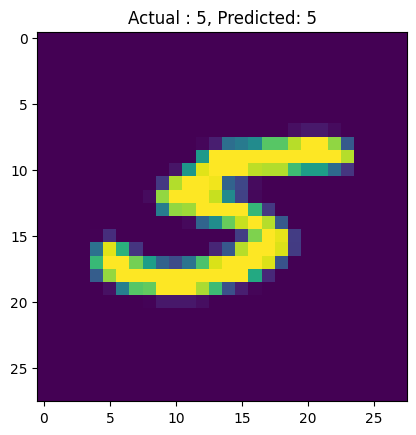

1/1 [==============================] - 0s 67ms/step


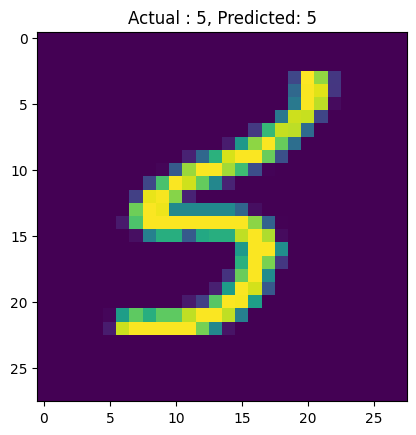

1/1 [==============================] - 0s 80ms/step


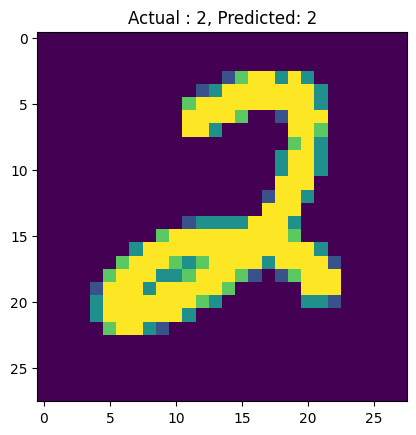

In [15]:
n = 3
random_choices = np.random.choice(x_test.shape[0], n, replace = False)

for i, idx in enumerate(random_choices):
    img = x_test[idx]
    label = np.argmax(y_test[idx])

    pred = model.predict(np.expand_dims(img, axis=0))
    pred_l = np.argmax(pred)

    plt.imshow(img.reshape(28,28))
    plt.title(f"Actual : {label}, Predicted: {pred_l}")
    plt.show()